In [44]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
def base_patterns(n = 1, x = 64, y = 64):
    res = []
    fig, ax = plt.subplots(1, n, figsize = (18, 6))
    try:
        axes = ax.ravel()
    except:
        axes = []
        axes.append(ax)
    
    for i in range(n):
        im = -np.ones((x, y))
        im[np.random.randint(0, y/2):np.random.randint(x/2, y),
           np.random.randint(0, y/2):np.random.randint(x/2, y)] = 1
        
        axes[i].imshow(im, cmap = 'binary')
        axes[i].set_title('pattern {}'.format(i))
        
        im = np.reshape(im, (x * y))
        res.append(im)
        
    return np.array(res).T

In [4]:
def energy(state, W):
    return -0.5 * state @ W @ state

In [29]:
howmany = 3

In [30]:
width = 128
height = 128

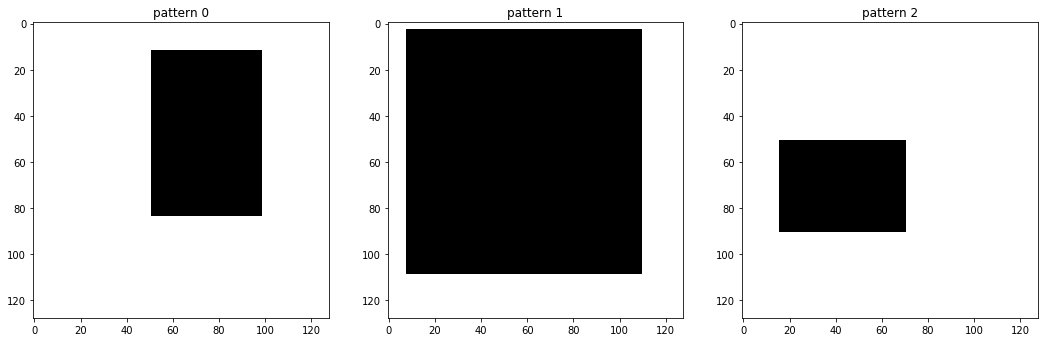

In [37]:
X = base_patterns(howmany, width, height)

In [38]:
c = 1
M = c * (1/(width * height)) * (X @ X.T)

In [40]:
np.fill_diagonal(M, 0)

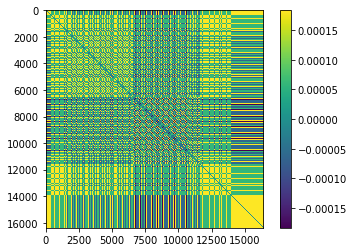

In [45]:
plt.imshow(M)
plt.colorbar()

In [55]:
which = np.random.randint(0, howmany)

sigma = 1
vt = X[:, which] + sigma * np.random.randn((width * height))
vt[vt > 0] = 1
vt[vt < 0] = -1

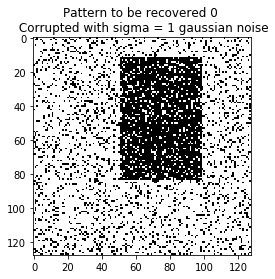

In [56]:
plt.imshow(np.reshape(vt, (width, height)), cmap = 'binary')
title = 'Pattern to be recovered {} \n Corrupted with sigma = {} gaussian noise'. format(which, sigma)
_ = plt.title(title)

In [57]:
ev = []
en = []

energy_old = np.infty
energy_new = energy(vt, M)
steps = 200
iteration = 0

In [58]:
while (energy_old > energy_new) and iteration < steps:
    iteration += 1
    energy_old = energy_new
    ev.append(np.copy(vt))
    en.append(energy_old)
    
    for pixel in np.split(np.random.randint(0, len(vt), width * height), 8):
        vt[pixel] = np.sign(M[pixel,:] @ vt)
    
    energy_new = energy(vt, M)

print('Stopped at iteration {}'.format(iteration))

Stopped at iteration 10


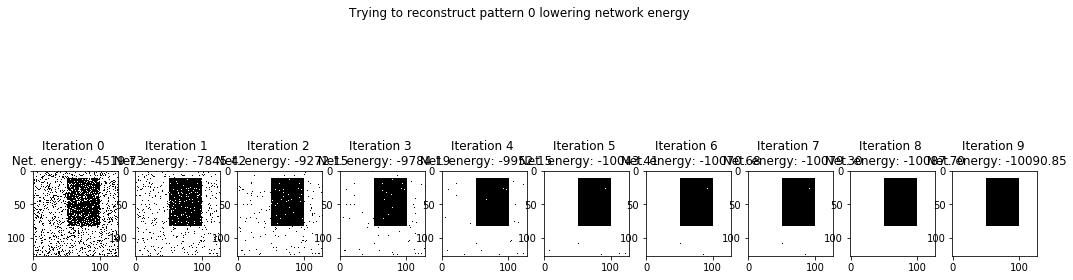

In [62]:
show_every = 1
fig, ax = plt.subplots(1, int(len(ev)//show_every), figsize = (18, 6))
axes = ax.ravel()
fig.suptitle('Trying to reconstruct pattern {} lowering network energy'.format(which))
plot_idx = 0

for idx in range(len(ev)):
    if (idx%show_every) == 0:
        axes[plot_idx].imshow(np.reshape(ev[idx], (width, height)), cmap = 'binary')
        axes[plot_idx].set_title('Iteration {} \n Net. energy: {:.2f}'.format(idx, en[idx]))
        plot_idx += 1